In [1]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
RAV = "/kaggle/input/dataset-ravdess"
# Run one example 
dir_list = os.listdir(RAV)
dir_list[0:5]

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21']

In [3]:
import librosa.display
import tensorflow as tf
import numpy as np
import os

# Load the RAVDESS dataset
def load_data(dataset_path):
    file_paths = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".wav"):
                file_paths.append(os.path.join(root, file))
                labels.append(file.split('-')[2])  # Extract emotion label from filename
    return file_paths, labels

# Extract MFCC features with delta & delta-delta
def extract_mfcc(file_path, n_mfcc=40, max_pad_length=200):  # Define a fixed length
    audio, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    
    # Compute delta and delta-delta
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    
    # Combine all features
    mfcc_combined = np.vstack([mfcc, mfcc_delta, mfcc_delta2])
    mfcc_combined = librosa.power_to_db(mfcc_combined, ref=np.max)
    
    # Padding or truncation
    if mfcc_combined.shape[1] < max_pad_length:
        pad_width = max_pad_length - mfcc_combined.shape[1]
        mfcc_combined = np.pad(mfcc_combined, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc_combined = mfcc_combined[:, :max_pad_length]  # Truncate if longer
    
    return mfcc_combined.T  # Transpose to (time_steps, features)

# Load dataset and extract features
dataset_path = "/kaggle/input/dataset-ravdess"  # Replace with actual path
file_paths, labels = load_data(dataset_path)

# Extract MFCC features
features = [extract_mfcc(file_path) for file_path in file_paths]

# Convert to numpy arrays (now uniform shape)
X = np.array(features, dtype=np.float32)
y = np.array(labels)

print(f"Final feature shape: {X.shape}")  # Should be (num_samples, time_steps, features)


Final feature shape: (2880, 200, 120)


# **LSTM & BiLSTM**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.1807 - loss: 2.0571 - val_accuracy: 0.2465 - val_loss: 2.0137 - learning_rate: 1.0000e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.3142 - loss: 1.9378 - val_accuracy: 0.3177 - val_loss: 1.9140 - learning_rate: 1.0000e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.3931 - loss: 1.7971 - val_accuracy: 0.3802 - val_loss: 1.7754 - learning_rate: 1.0000e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.4832 - loss: 1.6331 - val_accuracy: 0.4670 - val_loss: 1.6089 - learning_rate: 1.0000e-04
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.5636 - loss: 1.4370 - val_accuracy: 0.5156 - val_loss: 1.4456 - learning_rate: 1.0000e-04
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.6723 - loss: 1.1696 - val_accuracy: 0.5295 - val_loss: 1.3635 - learning_rate: 1.0000e-04
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.1703 - loss: 2.0516 - val_accuracy: 0.2934 - val_loss: 1.9960 - learning_rate: 1.0000e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.3295 - loss: 1.9090 - val_accuracy: 0.3611 - val_loss: 1.8776 - learning_rate: 1.0000e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.4514 - loss: 1.7416 - val_accuracy: 0.3906 - val_loss: 1.7447 - learning_rate: 1.0000e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.5285 - loss: 1.5127 - val_accuracy: 0.4740 - val_loss: 1.5343 - learning_rate: 1.0000e-04
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.6402 - loss: 1.2547 - val_accuracy: 0.5729 - val_loss: 1.2917 - learning_rate: 1.0000e-04
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.7257 - loss: 0.9705 - val_accuracy: 0.6250 - val_loss: 1.1177 - learning_rate: 1.0000e-04
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy:

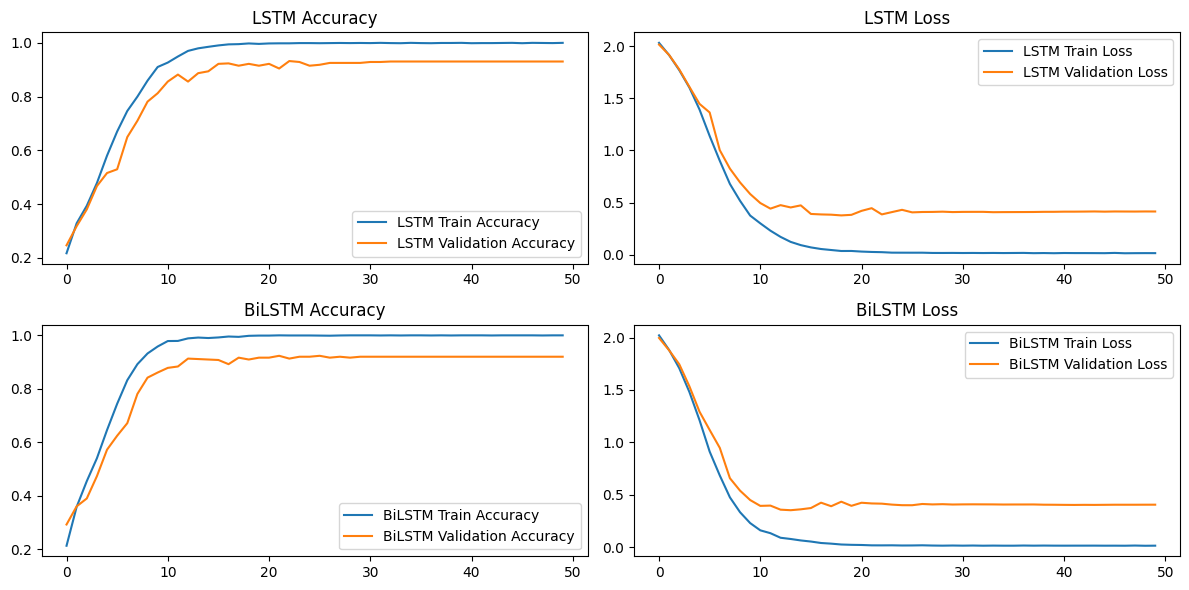

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

          01       0.85      0.94      0.89        35
          02       0.93      0.95      0.94        84
          03       0.94      0.91      0.93        69
          04       0.95      0.87      0.91        89
          05       0.98      0.98      0.98        87
          06       0.88      0.97      0.92        62
          07       0.92      0.95      0.93        75
          08       0.94      0.89      0.92        75

    accuracy                           0.93       576
   macro avg       0.92      0.93      0.93       576
weighted avg       0.93      0.93      0.93       576

BiLSTM Classification Report:
              precision    recall  f1-score   support

          01       0.89      0.94      0.92        35
          02       0.93      0.95      0.94        84
          03       0.94      0.88      0.91     

In [4]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Function to extract RMS, ZCR, and MFCC features
def extract_features(file_path, n_mfcc=40, max_pad_length=200):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Extract RMS Energy (Loudness)
    rms = librosa.feature.rms(y=audio)

    # Extract Zero-Crossing Rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=audio)

    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

    # Compute delta (1st derivative) and delta-delta (2nd derivative)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    # Combine all features into one array
    features = np.vstack([rms, zcr, mfcc, mfcc_delta, mfcc_delta2])

    # Convert to decibels for normalization
    features = librosa.power_to_db(features, ref=np.max)

    # Pad or truncate to a fixed length
    if features.shape[1] < max_pad_length:
        pad_width = max_pad_length - features.shape[1]
        features = np.pad(features, ((0, 0), (0, pad_width)), mode='constant')
    else:
        features = features[:, :max_pad_length]

    return features.T  # Shape (200, feature_dim)

# Load the dataset
dataset_path = "/kaggle/input/dataset-ravdess"  # Replace with your dataset path

def load_data(dataset_path):
    file_paths = []
    labels = []
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".wav"):
                file_paths.append(os.path.join(root, file))
                labels.append(file.split('-')[2])  # Extract emotion label from filename
    return file_paths, labels

file_paths, labels = load_data(dataset_path)

# Extract features for all audio files
features = [extract_features(file) for file in file_paths]

# Convert to numpy arrays
X = np.array(features, dtype=np.float32)
y = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X.shape[2])).reshape(X_test.shape)

# Define input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_categorical.shape[1]

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Function to build an LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(512, return_sequences=True, input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.4),

        LSTM(256, return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),

        LSTM(128, return_sequences=True),
        Dropout(0.4),

        LSTM(64),  # Final LSTM layer
        Dropout(0.3),

        Dense(128, activation='swish'),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to build a BiLSTM model
def build_bilstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(512, return_sequences=True), input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.4),

        LSTM(256, return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),

        LSTM(128, return_sequences=True),
        Dropout(0.4),

        LSTM(64),
        Dropout(0.3),

        Dense(128, activation='swish'),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train LSTM Model
lstm_model = build_lstm_model(input_shape, num_classes)
lstm_history = lstm_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[reduce_lr])

# Train BiLSTM Model
bilstm_model = build_bilstm_model(input_shape, num_classes)
bilstm_history = bilstm_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[reduce_lr])

# Evaluate Models
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_scaled, y_test)
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_scaled, y_test)

print(f"LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}")
print(f"BiLSTM Model - Loss: {bilstm_loss}, Accuracy: {bilstm_accuracy}")

# Plot Training & Validation Accuracy & Loss
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(bilstm_history.history['accuracy'], label='BiLSTM Train Accuracy')
plt.plot(bilstm_history.history['val_accuracy'], label='BiLSTM Validation Accuracy')
plt.title('BiLSTM Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(bilstm_history.history['loss'], label='BiLSTM Train Loss')
plt.plot(bilstm_history.history['val_loss'], label='BiLSTM Validation Loss')
plt.title('BiLSTM Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix & Classification Report
y_pred_lstm = np.argmax(lstm_model.predict(X_test_scaled), axis=1)
y_pred_bilstm = np.argmax(bilstm_model.predict(X_test_scaled), axis=1)
y_true = np.argmax(y_test, axis=1)

print("LSTM Classification Report:")
print(classification_report(y_true, y_pred_lstm, target_names=label_encoder.classes_))

print("BiLSTM Classification Report:")
print(classification_report(y_true, y_pred_bilstm, target_names=label_encoder.classes_))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

          01       0.85      0.94      0.89        35
          02       0.93      0.95      0.94        84
          03       0.94      0.91      0.93        69
          04       0.95      0.87      0.91        89
          05       0.98      0.98      0.98        87
          06       0.88      0.97      0.92        62
          07       0.92      0.95      0.93        75
          08       0.94      0.89      0.92        75

    accuracy                           0.93       576
   macro avg       0.92      0.93      0.93       576
weighted avg       0.93      0.93      0.93       576

BiLSTM Classification Report:
              precision    recall  f1-score   support

          01       0.89      0.94      0.92        35
          02       0.93      0.95      0.94        84
          03       0.94      0.88      0.91     

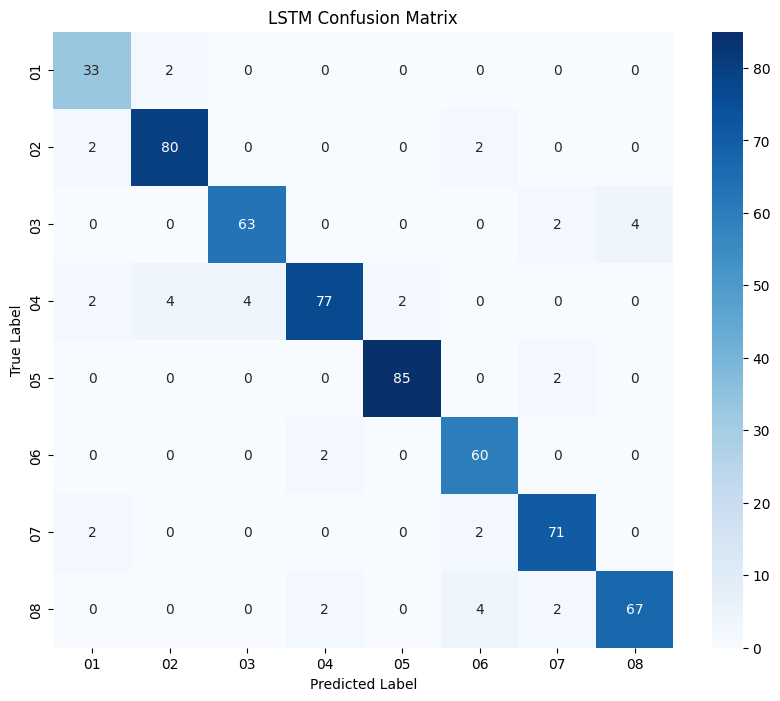

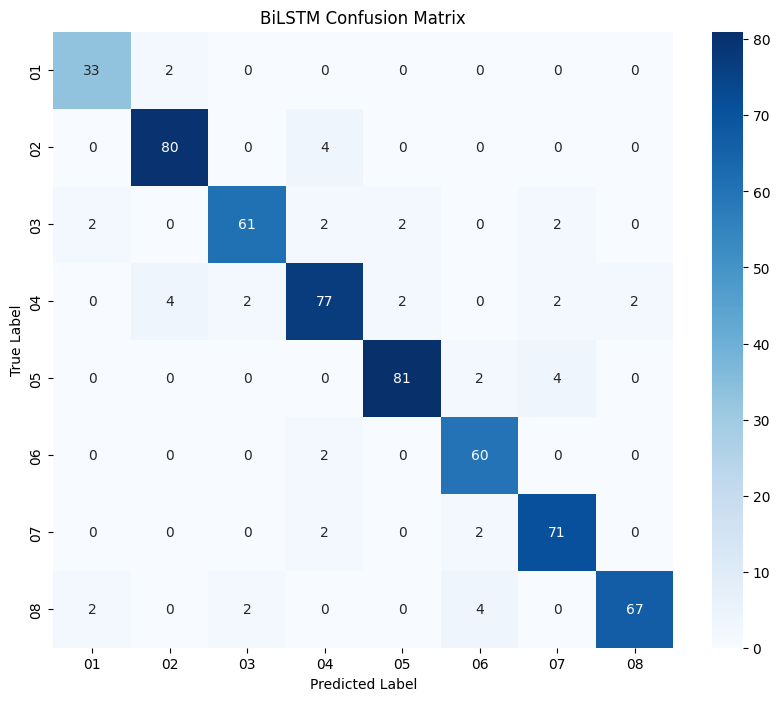


🔹 Conclusion:
1️⃣ If the confusion matrix shows most predictions along the diagonal, the model is performing well.
2️⃣ If accuracy is low and there are many misclassified instances, consider improving feature extraction or balancing the dataset.
3️⃣ Compare LSTM and BiLSTM results – if BiLSTM performs significantly better, bidirectional context is helping.
4️⃣ If certain emotions are never predicted, check for class imbalance or overlapping features.


In [5]:
# Generate Predictions
y_pred_lstm = np.argmax(lstm_model.predict(X_test_scaled), axis=1)
y_pred_bilstm = np.argmax(bilstm_model.predict(X_test_scaled), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate Classification Reports
print("LSTM Classification Report:")
print(classification_report(y_true, y_pred_lstm, target_names=label_encoder.classes_, zero_division=1))

print("BiLSTM Classification Report:")
print(classification_report(y_true, y_pred_bilstm, target_names=label_encoder.classes_, zero_division=1))

# Plot Confusion Matrix for LSTM
plt.figure(figsize=(10, 8))
lstm_cm = confusion_matrix(y_true, y_pred_lstm)
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot Confusion Matrix for BiLSTM
plt.figure(figsize=(10, 8))
bilstm_cm = confusion_matrix(y_true, y_pred_bilstm)
sns.heatmap(bilstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('BiLSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Conclusion
print("\n🔹 Conclusion:")
print("1️⃣ If the confusion matrix shows most predictions along the diagonal, the model is performing well.")
print("2️⃣ If accuracy is low and there are many misclassified instances, consider improving feature extraction or balancing the dataset.")
print("3️⃣ Compare LSTM and BiLSTM results – if BiLSTM performs significantly better, bidirectional context is helping.")
print("4️⃣ If certain emotions are never predicted, check for class imbalance or overlapping features.")


# **Wav2Vec2**

# **CNN**

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 162MB/s]


Epoch  1/30 | Train Loss: 1.6530 | Val Loss: 1.4807 | Val Acc: 46.01%
Epoch  2/30 | Train Loss: 0.9923 | Val Loss: 1.4889 | Val Acc: 50.87%
Epoch  3/30 | Train Loss: 0.7071 | Val Loss: 1.5343 | Val Acc: 52.95%
Epoch  4/30 | Train Loss: 0.5438 | Val Loss: 1.6933 | Val Acc: 54.17%
Epoch  5/30 | Train Loss: 0.4116 | Val Loss: 1.8469 | Val Acc: 57.81%
Epoch  6/30 | Train Loss: 0.3008 | Val Loss: 1.6526 | Val Acc: 61.46%
Epoch  7/30 | Train Loss: 0.2441 | Val Loss: 1.8135 | Val Acc: 57.99%
Epoch  8/30 | Train Loss: 0.2261 | Val Loss: 1.7400 | Val Acc: 58.33%
Epoch  9/30 | Train Loss: 0.2025 | Val Loss: 1.8090 | Val Acc: 59.55%
Epoch 10/30 | Train Loss: 0.2008 | Val Loss: 1.8059 | Val Acc: 61.28%
Epoch 11/30 | Train Loss: 0.1567 | Val Loss: 1.7798 | Val Acc: 59.55%
Epoch 12/30 | Train Loss: 0.1574 | Val Loss: 1.9069 | Val Acc: 58.33%
Epoch 13/30 | Train Loss: 0.1278 | Val Loss: 1.8627 | Val Acc: 60.94%
Epoch 14/30 | Train Loss: 0.1267 | Val Loss: 1.8224 | Val Acc: 60.94%
Epoch 15/30 | Train 

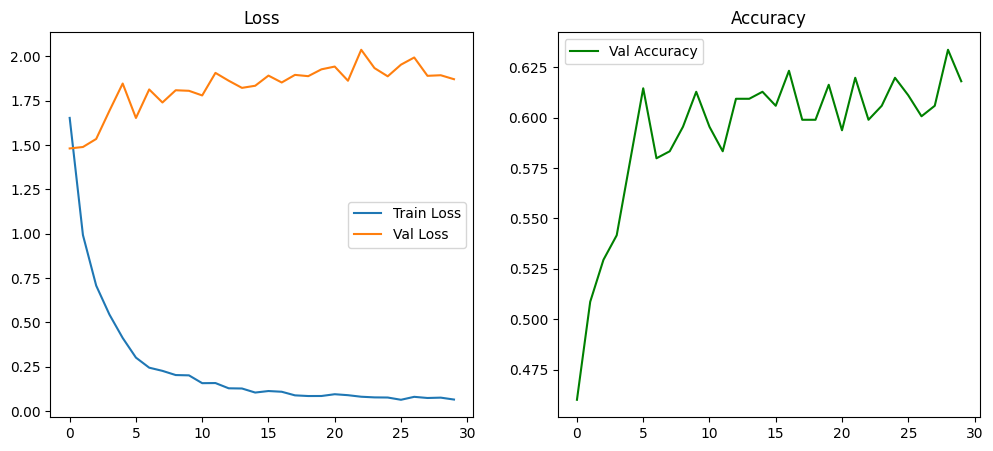

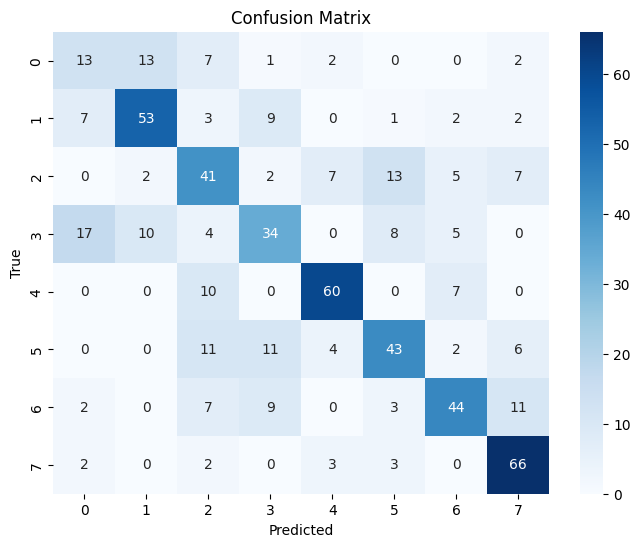

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.34      0.33        38
           1       0.68      0.69      0.68        77
           2       0.48      0.53      0.51        77
           3       0.52      0.44      0.47        78
           4       0.79      0.78      0.78        77
           5       0.61      0.56      0.58        77
           6       0.68      0.58      0.62        76
           7       0.70      0.87      0.78        76

    accuracy                           0.61       576
   macro avg       0.60      0.60      0.59       576
weighted avg       0.61      0.61      0.61       576



In [7]:
import os
import torch
import librosa
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader

# ✅ Load Dataset
def load_data(path):
    files, labels = [], []
    for root, _, f in os.walk(path):
        for file in f:
            if file.endswith(".wav"):
                files.append(os.path.join(root, file))
                labels.append(int(file.split('-')[2]) - 1)
    return files, labels

dataset_path = "/kaggle/input/dataset-ravdess"
file_paths, labels = load_data(dataset_path)
num_classes = 8

# ✅ Audio Dataset
class AudioDataset(Dataset):
    def __init__(self, paths, labels, n_mels=128, max_len=128):
        self.paths, self.labels = paths, labels
        self.n_mels, self.max_len = n_mels, max_len

    def __len__(self): return len(self.paths)

    def __getitem__(self, idx):
        audio, sr = librosa.load(self.paths[idx], sr=16000)
        if np.random.rand() < 0.3:  # Noise Augmentation
            audio += 0.005 * np.random.normal(0, 1, len(audio))

        mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=self.n_mels)
        mel = librosa.power_to_db(mel, ref=np.max)
        mel = np.pad(mel, ((0, 0), (0, max(0, self.max_len - mel.shape[1]))), mode='constant')[:, :self.max_len]

        mel = torch.tensor(mel, dtype=torch.float32).unsqueeze(0).repeat(3, 1, 1)  # Convert to 3-channel
        return mel, torch.tensor(self.labels[idx], dtype=torch.long)

# ✅ Data Loaders
train_size = int(0.8 * len(file_paths))
train_ds, test_ds = AudioDataset(file_paths[:train_size], labels[:train_size]), AudioDataset(file_paths[train_size:], labels[train_size:])
train_loader, test_loader = DataLoader(train_ds, batch_size=32, shuffle=True), DataLoader(test_ds, batch_size=32, shuffle=False)

# ✅ Model Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
model.classifier = nn.Sequential(nn.Linear(model.classifier[1].in_features, 256), nn.ReLU(), nn.Dropout(0.3), nn.Linear(256, num_classes))
model = model.to(device)

criterion, optimizer = nn.CrossEntropyLoss(), optim.Adam(model.parameters(), lr=0.0003)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# ✅ Training Loop
EPOCHS = 30
train_losses, val_losses, val_accs = [], [], []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for mel, label in train_loader:
        mel, label = mel.to(device), label.to(device)
        optimizer.zero_grad()
        loss = criterion(model(mel), label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))

    # ✅ Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for mel, label in test_loader:
            mel, label = mel.to(device), label.to(device)
            outputs = model(mel)
            val_loss += criterion(outputs, label).item()
            correct += (outputs.argmax(dim=1) == label).sum().item()
            total += label.size(0)

    val_losses.append(val_loss / len(test_loader))
    val_accs.append(correct / total)
    scheduler.step()

    print(f"Epoch {epoch+1:2d}/{EPOCHS} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accs[-1]:.2%}")

# ✅ Plot Loss & Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.plot(train_losses, label='Train Loss'); plt.plot(val_losses, label='Val Loss'); plt.legend(); plt.title("Loss")
plt.subplot(1, 2, 2); plt.plot(val_accs, label='Val Accuracy', color='green'); plt.legend(); plt.title("Accuracy")
plt.show()

# ✅ Confusion Matrix & Report
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for mel, label in test_loader:
        mel, label = mel.to(device), label.to(device)
        y_true.extend(label.cpu().numpy())
        y_pred.extend(model(mel).argmax(dim=1).cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

print("🔹 Classification Report:\n", classification_report(y_true, y_pred))


# **Hybrid CNN+LSTM**

Starting training...
Epoch: 1/30
Train Loss: 2.0772 | Train Acc: 11.55%
Val Loss: 2.0560 | Val Acc: 14.41%
--------------------------------------------------
Epoch: 2/30
Train Loss: 2.0078 | Train Acc: 17.27%
Val Loss: 1.9590 | Val Acc: 19.10%
--------------------------------------------------
Epoch: 3/30
Train Loss: 1.9120 | Train Acc: 23.18%
Val Loss: 1.9100 | Val Acc: 26.91%
--------------------------------------------------
Epoch: 4/30
Train Loss: 1.8347 | Train Acc: 28.17%
Val Loss: 1.7973 | Val Acc: 31.25%
--------------------------------------------------
Epoch: 5/30
Train Loss: 1.7304 | Train Acc: 31.73%
Val Loss: 1.7788 | Val Acc: 30.38%
--------------------------------------------------
Epoch: 6/30
Train Loss: 1.6687 | Train Acc: 34.59%
Val Loss: 1.7440 | Val Acc: 30.90%
--------------------------------------------------
Epoch: 7/30
Train Loss: 1.6099 | Train Acc: 36.28%
Val Loss: 1.7020 | Val Acc: 36.63%
--------------------------------------------------
Epoch: 8/30
Train Lo

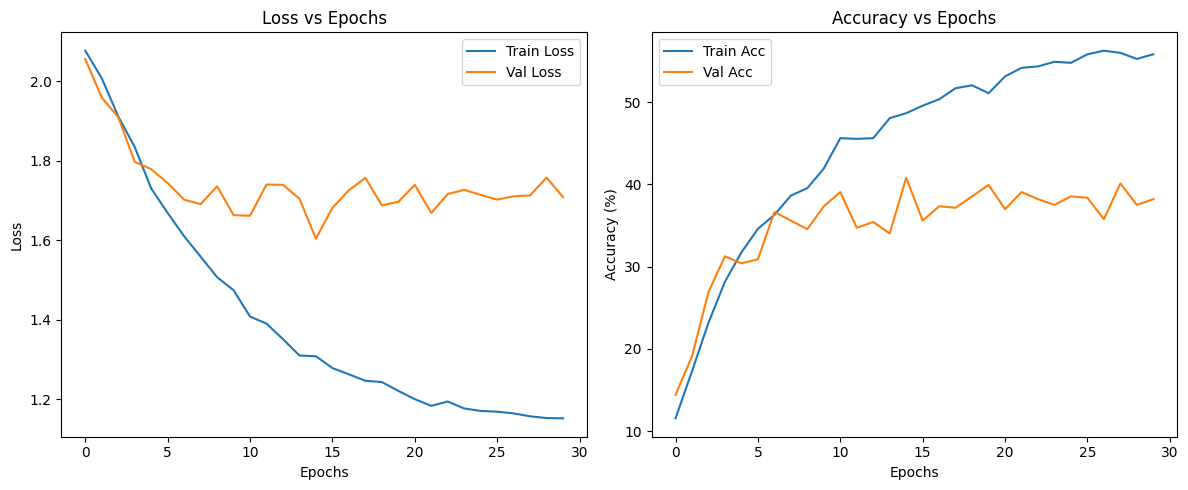

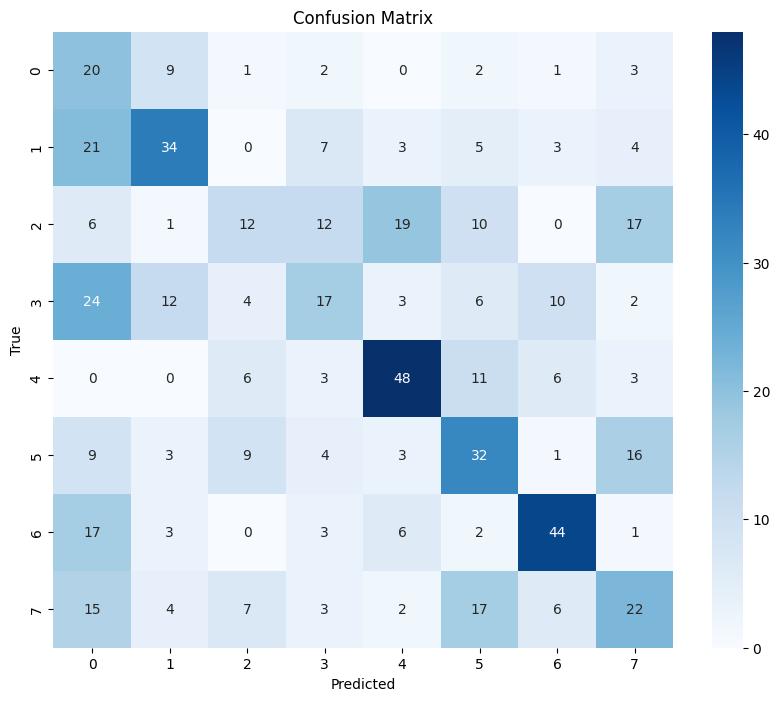


Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.53      0.27        38
           1       0.52      0.44      0.48        77
           2       0.31      0.16      0.21        77
           3       0.33      0.22      0.26        78
           4       0.57      0.62      0.60        77
           5       0.38      0.42      0.40        77
           6       0.62      0.58      0.60        76
           7       0.32      0.29      0.31        76

    accuracy                           0.40       576
   macro avg       0.40      0.41      0.39       576
weighted avg       0.42      0.40      0.40       576



In [7]:
import os
import torch
import librosa
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight

# Load Dataset
def load_data(path):
    files, labels = [], []
    for root, _, f in os.walk(path):
        for file in f:
            if file.endswith(".wav"):
                files.append(os.path.join(root, file))
                labels.append(int(file.split('-')[2]) - 1)
    return files, labels

# Audio Dataset
class AudioDataset(Dataset):
    def __init__(self, paths, labels, n_mels=128, max_len=128):
        self.paths = paths
        self.labels = labels
        self.n_mels = n_mels
        self.max_len = max_len

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        # Load and preprocess audio
        audio, sr = librosa.load(self.paths[idx], sr=16000, duration=3.0)
        
        # Ensure audio length
        if len(audio) < sr * 3:
            audio = np.pad(audio, (0, sr * 3 - len(audio)))
        
        # Apply random noise augmentation
        if np.random.rand() < 0.3:
            audio += 0.005 * np.random.normal(0, 1, len(audio))

        # Convert to mel spectrogram
        mel = librosa.feature.melspectrogram(
            y=audio, 
            sr=sr,
            n_mels=self.n_mels,
            hop_length=len(audio)//self.max_len
        )
        
        mel = librosa.power_to_db(mel, ref=np.max)
        
        # Ensure exact size
        if mel.shape[1] != self.max_len:
            mel = np.resize(mel, (self.n_mels, self.max_len))
        
        # Normalize
        mel = (mel - mel.mean()) / (mel.std() + 1e-8)
        
        # Convert to tensor
        mel = torch.tensor(mel, dtype=torch.float32).unsqueeze(0)
        return mel, torch.tensor(self.labels[idx], dtype=torch.long)

# CNN + LSTM Model
class CNN_LSTM(nn.Module):
    def __init__(self, num_classes):
        super(CNN_LSTM, self).__init__()

        # CNN Feature Extractor
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Embedding layer to reduce feature dimensions
        self.embedding = nn.Linear(64 * 32, 64)

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=64,
            hidden_size=128,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )

        # Fully Connected Layer
        self.fc = nn.Sequential(
            nn.Linear(128 * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        # Input shape: (batch_size, 1, 128, 128)
        batch_size = x.size(0)
        
        # CNN Feature Extraction
        x = self.conv_layers(x)  # Shape: (batch_size, 64, 32, 32)
        
        # Prepare for LSTM
        x = x.permute(0, 2, 1, 3)  # Shape: (batch_size, 32, 64, 32)
        x = x.reshape(batch_size, 32, -1)  # Shape: (batch_size, 32, 64*32)
        
        # Reduce feature dimensions
        x = self.embedding(x)  # Shape: (batch_size, 32, 64)
        
        # LSTM Processing
        x, _ = self.lstm(x)  # Shape: (batch_size, 32, 256)
        
        # Take final output
        x = x[:, -1, :]  # Shape: (batch_size, 256)
        
        # Classification
        x = self.fc(x)
        return x

# Training Function
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for mel, label in loader:
        mel, label = mel.to(device), label.to(device)
        
        optimizer.zero_grad()
        outputs = model(mel)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item()

    return total_loss / len(loader), 100. * correct / total

# Validation Function
def validate(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for mel, label in loader:
            mel, label = mel.to(device), label.to(device)
            outputs = model(mel)
            loss = criterion(outputs, label)
            
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += label.size(0)
            correct += predicted.eq(label).sum().item()

    return total_loss / len(loader), 100. * correct / total

# Main Training Loop
def main():
    # Setup
    dataset_path = "/kaggle/input/dataset-ravdess"
    file_paths, labels = load_data(dataset_path)
    num_classes = 8

    # Compute class weights
    class_weights = compute_class_weight("balanced", classes=np.unique(labels), y=labels)
    class_weights = torch.tensor(class_weights, dtype=torch.float32)

    # Create data loaders
    train_size = int(0.8 * len(file_paths))
    train_ds = AudioDataset(file_paths[:train_size], labels[:train_size])
    test_ds = AudioDataset(file_paths[train_size:], labels[train_size:])
    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

    # Setup model and training
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNN_LSTM(num_classes).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
    optimizer = optim.Adam(model.parameters(), lr=0.0003)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    # Training loop
    num_epochs = 30
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    print("Starting training...")
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, test_loader, criterion, device)
        
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        scheduler.step()
        
        print(f'Epoch: {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
        print('-' * 50)

    # Plot results
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Generate confusion matrix
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for mel, label in test_loader:
            mel, label = mel.to(device), label.to(device)
            outputs = model(mel)
            _, predicted = outputs.max(1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

if __name__ == "__main__":
    main()

# **Hybrid Eff_net+LSTM**

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 161MB/s]


Epoch  1/50 | Train Loss: 2.0455 | Val Loss: 1.9149 | Val Acc: 25.17%
Epoch  2/50 | Train Loss: 1.7342 | Val Loss: 1.6116 | Val Acc: 35.94%
Epoch  3/50 | Train Loss: 1.4870 | Val Loss: 1.5933 | Val Acc: 39.24%
Epoch  4/50 | Train Loss: 1.3405 | Val Loss: 1.5181 | Val Acc: 45.14%
Epoch  5/50 | Train Loss: 1.1387 | Val Loss: 1.4903 | Val Acc: 47.40%
Epoch  6/50 | Train Loss: 1.0945 | Val Loss: 1.4315 | Val Acc: 47.22%
Epoch  7/50 | Train Loss: 1.0025 | Val Loss: 1.4618 | Val Acc: 48.44%
Epoch  8/50 | Train Loss: 0.9060 | Val Loss: 1.5586 | Val Acc: 47.74%
Epoch  9/50 | Train Loss: 0.8607 | Val Loss: 1.4719 | Val Acc: 49.13%
Epoch 10/50 | Train Loss: 0.8715 | Val Loss: 1.5659 | Val Acc: 49.31%
Epoch 11/50 | Train Loss: 0.7845 | Val Loss: 1.5469 | Val Acc: 50.52%
Epoch 12/50 | Train Loss: 0.7537 | Val Loss: 1.4888 | Val Acc: 53.65%
Epoch 13/50 | Train Loss: 0.7525 | Val Loss: 1.5596 | Val Acc: 52.78%
Epoch 14/50 | Train Loss: 0.6990 | Val Loss: 1.4625 | Val Acc: 54.51%
Epoch 15/50 | Train 

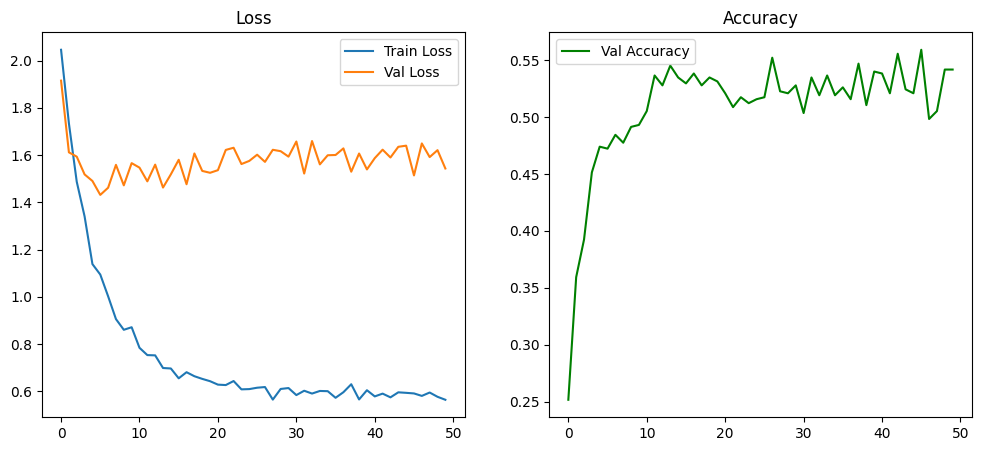

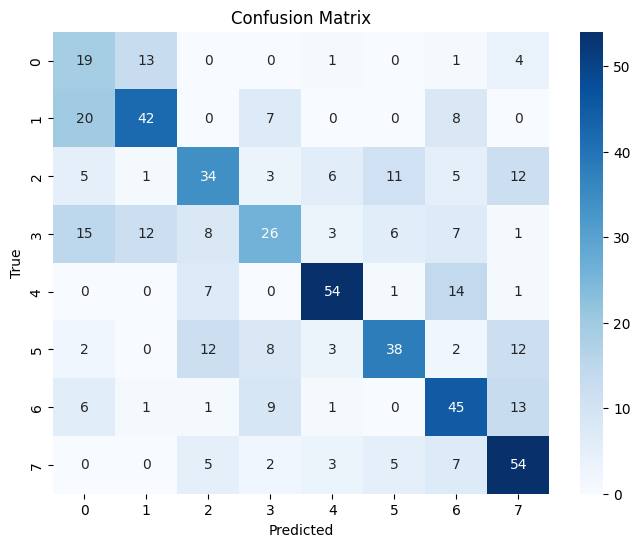

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.50      0.36        38
           1       0.61      0.55      0.58        77
           2       0.51      0.44      0.47        77
           3       0.47      0.33      0.39        78
           4       0.76      0.70      0.73        77
           5       0.62      0.49      0.55        77
           6       0.51      0.59      0.55        76
           7       0.56      0.71      0.62        76

    accuracy                           0.54       576
   macro avg       0.54      0.54      0.53       576
weighted avg       0.56      0.54      0.54       576



In [1]:
import os
import torch
import librosa
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight

# ✅ Load Dataset
def load_data(path):
    files, labels = [], []
    for root, _, f in os.walk(path):
        for file in f:
            if file.endswith(".wav"):
                files.append(os.path.join(root, file))
                labels.append(int(file.split('-')[2]) - 1)
    return files, labels

dataset_path = "/kaggle/input/dataset-ravdess"
file_paths, labels = load_data(dataset_path)
num_classes = 8

# ✅ Compute Class Weights (For Imbalanced Classes)
class_weights = compute_class_weight("balanced", classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# ✅ Audio Dataset with Fixed Channel Size (Convert 1-Channel to 3-Channel)
class AudioDataset(Dataset):
    def __init__(self, paths, labels, n_mels=128, max_len=128):
        self.paths, self.labels = paths, labels
        self.n_mels, self.max_len = n_mels, max_len

    def __len__(self): return len(self.paths)

    def __getitem__(self, idx):
        audio, sr = librosa.load(self.paths[idx], sr=16000)

        # ✅ Data Augmentation (Fixing pitch_shift & time_stretch)
        if np.random.rand() < 0.3:
            audio = librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=np.random.uniform(-2, 2))
        if np.random.rand() < 0.3:
            audio = librosa.effects.time_stretch(y=audio, rate=np.random.uniform(0.8, 1.2))
        if np.random.rand() < 0.3:
            audio += 0.005 * np.random.normal(0, 1, len(audio))

        # ✅ Extract Mel-Spectrogram
        mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=self.n_mels)
        mel = librosa.power_to_db(mel, ref=np.max)
        mel = np.pad(mel, ((0, 0), (0, max(0, self.max_len - mel.shape[1]))), mode='constant')[:, :self.max_len]

        # ✅ Convert 1-Channel to 3-Channel (For EfficientNet)
        mel = torch.tensor(mel, dtype=torch.float32).unsqueeze(0)  # Shape: (1, H, W)
        mel = mel.repeat(3, 1, 1)  # Convert (1, H, W) -> (3, H, W)

        return mel, torch.tensor(self.labels[idx], dtype=torch.long)

# ✅ Data Loaders
train_size = int(0.8 * len(file_paths))
train_ds, test_ds = AudioDataset(file_paths[:train_size], labels[:train_size]), AudioDataset(file_paths[train_size:], labels[train_size:])
train_loader, test_loader = DataLoader(train_ds, batch_size=32, shuffle=True), DataLoader(test_ds, batch_size=32, shuffle=False)

# ✅ CNN + LSTM Model (Using EfficientNet)
class CNN_LSTM(nn.Module):
    def __init__(self, num_classes):
        super(CNN_LSTM, self).__init__()

        # ✅ EfficientNet as CNN Feature Extractor (Fixed Input Size)
        self.cnn = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1).features

        # LSTM for Temporal Analysis (Increased Hidden Size)
        self.lstm = nn.LSTM(input_size=1280, hidden_size=512, num_layers=2, batch_first=True, bidirectional=True)

        # Fully Connected Layer (Added Dropout to Prevent Overfitting)
        self.fc = nn.Sequential(
            nn.Linear(512 * 2, 256),  # BiLSTM output
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)  # EfficientNet Feature Extraction
        x = x.permute(0, 2, 3, 1).reshape(x.size(0), -1, 1280)  # Reshape for LSTM
        x, _ = self.lstm(x)  # LSTM Processes Time Series Data
        x = self.fc(x[:, -1, :])  # Take Last LSTM Output
        return x

# ✅ Model Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_LSTM(num_classes).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced LR for Smoother Learning
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# ✅ Training Loop
EPOCHS = 50
train_losses, val_losses, val_accs = [], [], []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for mel, label in train_loader:
        mel, label = mel.to(device), label.to(device)
        optimizer.zero_grad()
        loss = criterion(model(mel), label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))

    # ✅ Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for mel, label in test_loader:
            mel, label = mel.to(device), label.to(device)
            outputs = model(mel)
            val_loss += criterion(outputs, label).item()
            correct += (outputs.argmax(dim=1) == label).sum().item()
            total += label.size(0)

    val_losses.append(val_loss / len(test_loader))
    val_accs.append(correct / total)
    scheduler.step()

    print(f"Epoch {epoch+1:2d}/{EPOCHS} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accs[-1]:.2%}")

# ✅ Plot Loss & Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.plot(train_losses, label='Train Loss'); plt.plot(val_losses, label='Val Loss'); plt.legend(); plt.title("Loss")
plt.subplot(1, 2, 2); plt.plot(val_accs, label='Val Accuracy', color='green'); plt.legend(); plt.title("Accuracy")
plt.show()

# ✅ Confusion Matrix & Report
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for mel, label in test_loader:
        mel, label = mel.to(device), label.to(device)
        y_true.extend(label.cpu().numpy())
        y_pred.extend(model(mel).argmax(dim=1).cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

print("🔹 Classification Report:\n", classification_report(y_true, y_pred))


# **Hybrid Eff_net+BiLSTM**

Epoch  1/50 | Train Loss: 2.0683 | Val Loss: 2.0436 | Val Acc: 23.61%
Epoch  2/50 | Train Loss: 1.8730 | Val Loss: 1.7150 | Val Acc: 34.20%
Epoch  3/50 | Train Loss: 1.6299 | Val Loss: 1.6347 | Val Acc: 36.63%
Epoch  4/50 | Train Loss: 1.4419 | Val Loss: 1.5554 | Val Acc: 42.71%
Epoch  5/50 | Train Loss: 1.2770 | Val Loss: 1.4225 | Val Acc: 46.88%
Epoch  6/50 | Train Loss: 1.0982 | Val Loss: 1.5028 | Val Acc: 45.14%
Epoch  7/50 | Train Loss: 1.0350 | Val Loss: 1.4856 | Val Acc: 48.78%
Epoch  8/50 | Train Loss: 0.9788 | Val Loss: 1.3821 | Val Acc: 52.08%
Epoch  9/50 | Train Loss: 0.9144 | Val Loss: 1.4651 | Val Acc: 51.74%
Epoch 10/50 | Train Loss: 0.8502 | Val Loss: 1.4655 | Val Acc: 50.69%
Epoch 11/50 | Train Loss: 0.8148 | Val Loss: 1.4986 | Val Acc: 51.22%
Epoch 12/50 | Train Loss: 0.7814 | Val Loss: 1.4782 | Val Acc: 52.78%
Epoch 13/50 | Train Loss: 0.7727 | Val Loss: 1.5091 | Val Acc: 52.26%
Epoch 14/50 | Train Loss: 0.7863 | Val Loss: 1.5063 | Val Acc: 54.34%
Epoch 15/50 | Train 

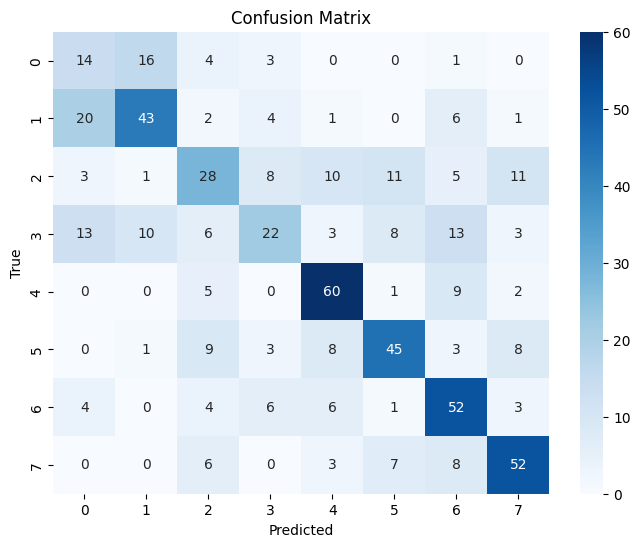

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.37      0.30        38
           1       0.61      0.56      0.58        77
           2       0.44      0.36      0.40        77
           3       0.48      0.28      0.35        78
           4       0.66      0.78      0.71        77
           5       0.62      0.58      0.60        77
           6       0.54      0.68      0.60        76
           7       0.65      0.68      0.67        76

    accuracy                           0.55       576
   macro avg       0.53      0.54      0.53       576
weighted avg       0.55      0.55      0.54       576



In [2]:
import os
import torch
import librosa
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import Dataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight

# ✅ Load Dataset with Error Handling
def load_data(path):
    files, labels = [], []
    for root, _, f in os.walk(path):
        for file in f:
            if file.endswith(".wav"):
                files.append(os.path.join(root, file))
                try:
                    label = int(file.split('-')[2]) - 1  # Extract emotion label
                    if 0 <= label < 8:  # Ensure valid range (0-7)
                        labels.append(label)
                    else:
                        print(f"Skipping file {file} due to invalid label {label}")
                except (ValueError, IndexError):
                    print(f"Skipping file {file} due to unexpected format.")

    return files, np.array(labels, dtype=int)  # Convert to integer NumPy array

dataset_path = "/kaggle/input/dataset-ravdess"
file_paths, labels = load_data(dataset_path)
num_classes = len(np.unique(labels))  # Detect number of unique classes

# ✅ Compute Class Weights (Fix Applied)
class_weights = compute_class_weight("balanced", classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# ✅ Audio Dataset with Augmentation & Channel Fix
class AudioDataset(Dataset):
    def __init__(self, paths, labels, n_mels=128, max_len=128):
        self.paths, self.labels = paths, labels
        self.n_mels, self.max_len = n_mels, max_len

    def __len__(self): return len(self.paths)

    def __getitem__(self, idx):
        audio, sr = librosa.load(self.paths[idx], sr=16000)

        # ✅ Data Augmentation
        if np.random.rand() < 0.3:
            audio = librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=np.random.uniform(-2, 2))
        if np.random.rand() < 0.3:
            audio = librosa.effects.time_stretch(y=audio, rate=np.random.uniform(0.8, 1.2))
        if np.random.rand() < 0.3:
            audio += 0.005 * np.random.normal(0, 1, len(audio))

        # ✅ Extract Mel-Spectrogram
        mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=self.n_mels)
        mel = librosa.power_to_db(mel, ref=np.max)
        mel = np.pad(mel, ((0, 0), (0, max(0, self.max_len - mel.shape[1]))), mode='constant')[:, :self.max_len]

        # ✅ Convert 1-Channel to 3-Channel (For EfficientNet)
        mel = torch.tensor(mel, dtype=torch.float32).unsqueeze(0)  # Shape: (1, H, W)
        mel = mel.repeat(3, 1, 1)  # Convert (1, H, W) -> (3, H, W)

        return mel, torch.tensor(self.labels[idx], dtype=torch.long)

# ✅ Data Loaders
train_size = int(0.8 * len(file_paths))
train_ds, test_ds = AudioDataset(file_paths[:train_size], labels[:train_size]), AudioDataset(file_paths[train_size:], labels[train_size:])
train_loader, test_loader = DataLoader(train_ds, batch_size=32, shuffle=True), DataLoader(test_ds, batch_size=32, shuffle=False)

# ✅ EfficientNet + BiLSTM Model
class EfficientNet_BiLSTM(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNet_BiLSTM, self).__init__()

        # ✅ EfficientNet as CNN Feature Extractor
        self.cnn = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1).features

        # ✅ BiLSTM for Temporal Analysis
        self.bilstm = nn.LSTM(input_size=1280, hidden_size=256, num_layers=2, batch_first=True, bidirectional=True)

        # ✅ Fully Connected Layer
        self.fc = nn.Sequential(
            nn.Linear(256 * 2, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.cnn(x)  # EfficientNet Feature Extraction
        x = x.permute(0, 2, 3, 1).reshape(x.size(0), -1, 1280)  # Reshape for BiLSTM
        x, _ = self.bilstm(x)  # BiLSTM Processes Time Series Data
        x = self.fc(x[:, -1, :])  # Take Last BiLSTM Output
        return x

# ✅ Model Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientNet_BiLSTM(num_classes).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced LR for Smoother Learning
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# ✅ Training Loop
EPOCHS = 50
train_losses, val_losses, val_accs = [], [], []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for mel, label in train_loader:
        mel, label = mel.to(device), label.to(device)
        optimizer.zero_grad()
        loss = criterion(model(mel), label)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_losses.append(total_loss / len(train_loader))

    # ✅ Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for mel, label in test_loader:
            mel, label = mel.to(device), label.to(device)
            outputs = model(mel)
            val_loss += criterion(outputs, label).item()
            correct += (outputs.argmax(dim=1) == label).sum().item()
            total += label.size(0)

    val_losses.append(val_loss / len(test_loader))
    val_accs.append(correct / total)
    scheduler.step()

    print(f"Epoch {epoch+1:2d}/{EPOCHS} | Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | Val Acc: {val_accs[-1]:.2%}")

# ✅ Confusion Matrix & Report
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for mel, label in test_loader:
        mel, label = mel.to(device), label.to(device)
        y_true.extend(label.cpu().numpy())
        y_pred.extend(model(mel).argmax(dim=1).cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

print("🔹 Classification Report:\n", classification_report(y_true, y_pred))


# **Hybrid LSTM+BiLSTM**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.1813 - loss: 2.0610 - val_accuracy: 0.2622 - val_loss: 2.0065 - learning_rate: 1.0000e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.3368 - loss: 1.9225 - val_accuracy: 0.3281 - val_loss: 1.8896 - learning_rate: 1.0000e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.4327 - loss: 1.7638 - val_accuracy: 0.4115 - val_loss: 1.7234 - learning_rate: 1.0000e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.5059 - loss: 1.5525 - val_accuracy: 0.5122 - val_loss: 1.4861 - learning_rate: 1.0000e-04
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.6640 - loss: 1.2232 - val_accuracy: 0.6024 - val_loss: 1.1809 - learning_rate: 1.0000e-04
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.7722 - loss: 0.9105 - val_accuracy: 0.6875 - val_loss: 0.9690 - learning_rate: 1.0000e-04
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy:

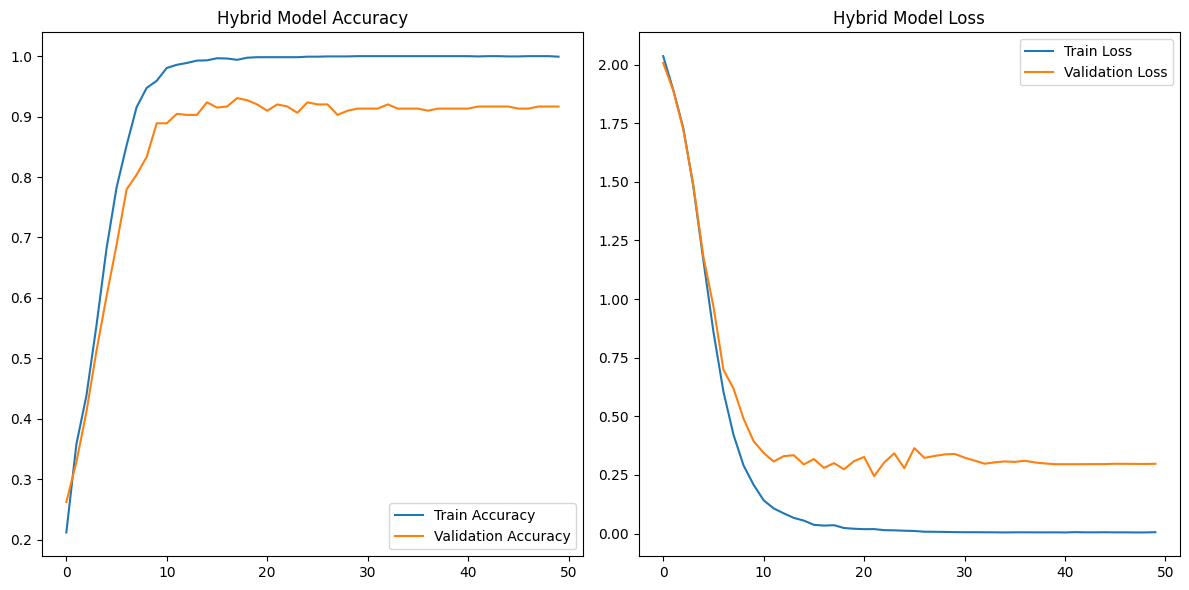

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


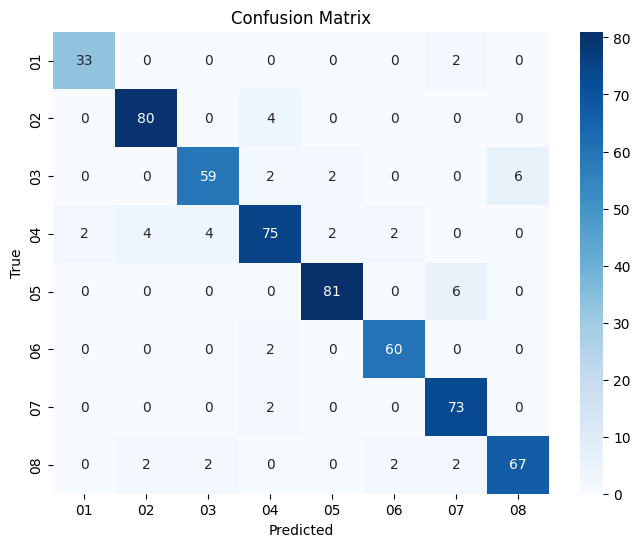

Hybrid Model Classification Report:
              precision    recall  f1-score   support

          01       0.94      0.94      0.94        35
          02       0.93      0.95      0.94        84
          03       0.91      0.86      0.88        69
          04       0.88      0.84      0.86        89
          05       0.95      0.93      0.94        87
          06       0.94      0.97      0.95        62
          07       0.88      0.97      0.92        75
          08       0.92      0.89      0.91        75

    accuracy                           0.92       576
   macro avg       0.92      0.92      0.92       576
weighted avg       0.92      0.92      0.92       576



In [6]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# ✅ Function to Extract Features
def extract_features(file_path, n_mfcc=40, max_pad_length=200):
    audio, sr = librosa.load(file_path, sr=None)
    rms = librosa.feature.rms(y=audio)
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    features = np.vstack([rms, zcr, mfcc, mfcc_delta, mfcc_delta2])
    features = librosa.power_to_db(features, ref=np.max)

    # ✅ Padding or Truncating
    if features.shape[1] < max_pad_length:
        pad_width = max_pad_length - features.shape[1]
        features = np.pad(features, ((0, 0), (0, pad_width)), mode='constant')
    else:
        features = features[:, :max_pad_length]

    return features.T  # Shape: (200, feature_dim)

# ✅ Load Dataset
dataset_path = "/kaggle/input/dataset-ravdess"

def load_data(dataset_path):
    file_paths, labels = [], []
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".wav"):
                file_paths.append(os.path.join(root, file))
                labels.append(file.split('-')[2])  # Extract emotion label
    return file_paths, labels

file_paths, labels = load_data(dataset_path)

# ✅ Extract Features
features = [extract_features(file) for file in file_paths]

# ✅ Convert to NumPy Arrays
X = np.array(features, dtype=np.float32)
y = np.array(labels)

# ✅ Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# ✅ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# ✅ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X.shape[2])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X.shape[2])).reshape(X_test.shape)

# ✅ Define Input Shape & Number of Classes
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_categorical.shape[1]

# ✅ Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# ✅ Hybrid LSTM + BiLSTM Model
def build_hybrid_model(input_shape, num_classes):
    model = Sequential([
        # ✅ First Layer: BiLSTM (Bidirectional LSTM)
        Bidirectional(LSTM(512, return_sequences=True), input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.4),

        # ✅ Second Layer: LSTM
        LSTM(256, return_sequences=True),
        BatchNormalization(),
        Dropout(0.4),

        # ✅ Third Layer: BiLSTM
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.4),

        # ✅ Fourth Layer: LSTM
        LSTM(64),
        Dropout(0.3),

        # ✅ Fully Connected Layers
        Dense(128, activation='swish'),
        Dense(num_classes, activation='softmax')
    ])

    # ✅ Optimizer & Compilation
    optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Train Hybrid Model
hybrid_model = build_hybrid_model(input_shape, num_classes)
hybrid_history = hybrid_model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[reduce_lr])

# ✅ Evaluate Model
hybrid_loss, hybrid_accuracy = hybrid_model.evaluate(X_test_scaled, y_test)
print(f"Hybrid Model - Loss: {hybrid_loss}, Accuracy: {hybrid_accuracy}")

# ✅ Plot Training & Validation Accuracy & Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hybrid_history.history['accuracy'], label='Train Accuracy')
plt.plot(hybrid_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Hybrid Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hybrid_history.history['loss'], label='Train Loss')
plt.plot(hybrid_history.history['val_loss'], label='Validation Loss')
plt.title('Hybrid Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ✅ Confusion Matrix & Classification Report
y_pred_hybrid = np.argmax(hybrid_model.predict(X_test_scaled), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_hybrid)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Hybrid Model Classification Report:")
print(classification_report(y_true, y_pred_hybrid, target_names=label_encoder.classes_))
